In [1]:
#create a random network

import  networkx as nx

n_nodes=40  #number of nodes
ba = nx.barabasi_albert_graph(n_nodes, 1)

In [2]:
#Assing funtion of nodes

#counters
cont_endponint=0
cont_server=0
cont_router=0

# Iterate over end nodes:
for v in nx.degree(ba):
    #if node connects only to one neighbour
    if v[1] == 1:
        
        #mark as endpoint and add numer:
        cont_endponint+=1
        ba.nodes[v[0]]['type'] = 'Ep'+str(cont_endponint)
        
        #if node has more connection choose whether is Server or router
    else:  
        if v[0] % 2 == 0:
            cont_router+=1
            ba.nodes[v[0]]['type'] = 'R'+str(cont_router)  
        else:
            cont_server+=1
            ba.nodes[v[0]]['type'] = 'S'+str(cont_server)               
                
print ('-Numer of endpoints:', cont_endponint,', -Numer of routers:',cont_router,', -Numer of servers:',cont_server)

-Numer of endpoints: 24 , -Numer of routers: 9 , -Numer of servers: 7


In [3]:
#create a dataframe to organize and analyze the information of the network 
#and add parameters of the each link
import pandas as pd

#capacity of links
SRV_LINK_CAP = 150
RUT_LINK_CAP = 200
EP_LINK_CAPu = 8
EP_LINK_CAPd = 16

#cost of using the links
SRV_LINK_UCOST = 10
RUT_LINK_UCOST = 15
EP_LINK_UCOST = 5

#cost of open the links
SRV_LINK_OCOST = 20
RUT_LINK_OCOST = 25
EP_LINK_OCOST = 10
        
data = pd.DataFrame([], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost', 'O_cost'])
for v in nx.degree(ba): 
    adj = list(nx.neighbors(ba, v[0]))
    for neig in adj:
        if ba.nodes[v[0]]['type'][0:1] == 'R' and ba.nodes[neig]['type'][0:1] == 'R': 
            data = data.append(pd.DataFrame([['',v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],RUT_LINK_CAP,RUT_LINK_UCOST,RUT_LINK_OCOST]], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost','O_cost']), ignore_index = True)
            
        elif ba.nodes[v[0]]['type'][0:1] == 'R' and ba.nodes[neig]['type'][0:1] == 'S':   
            data = data.append(pd.DataFrame([['',v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],SRV_LINK_CAP,SRV_LINK_UCOST,SRV_LINK_OCOST]], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost','O_cost']), ignore_index = True)
        
        elif ba.nodes[v[0]]['type'][0:1] == 'R' and ba.nodes[neig]['type'][0:1] == 'E':   
            data = data.append(pd.DataFrame([['',v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],EP_LINK_CAPd,EP_LINK_UCOST,EP_LINK_OCOST]], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost','O_cost']), ignore_index = True)
        
        elif ba.nodes[v[0]]['type'][0:1] == 'S' and ba.nodes[neig]['type'][0:1] == 'S':   
            data = data.append(pd.DataFrame([['',v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],SRV_LINK_CAP,SRV_LINK_UCOST,SRV_LINK_OCOST]], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost','O_cost']), ignore_index = True)
        
        elif ba.nodes[v[0]]['type'][0:1] == 'S' and ba.nodes[neig]['type'][0:1] == 'R':   
            data = data.append(pd.DataFrame([['',v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],SRV_LINK_CAP,SRV_LINK_UCOST,SRV_LINK_OCOST]], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost','O_cost']), ignore_index = True)

        elif ba.nodes[v[0]]['type'][0:1] == 'S' and ba.nodes[neig]['type'][0:1] == 'E':   
            data = data.append(pd.DataFrame([['',v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],EP_LINK_CAPd,EP_LINK_UCOST,EP_LINK_OCOST]], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost','O_cost']), ignore_index = True)
        
        elif ba.nodes[v[0]]['type'][0:1] == 'E' and ba.nodes[neig]['type'][0:1] == 'S':   
            data = data.append(pd.DataFrame([['',v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],EP_LINK_CAPu,EP_LINK_UCOST,EP_LINK_OCOST]], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost','O_cost']), ignore_index = True)

        elif ba.nodes[v[0]]['type'][0:1] == 'E' and ba.nodes[neig]['type'][0:1] == 'R':   
            data = data.append(pd.DataFrame([['',v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],EP_LINK_CAPu,EP_LINK_UCOST,EP_LINK_OCOST]], columns=['Edge_id','From_id','To_id','From_type','To_type','Capacity','U_cost','O_cost']), ignore_index = True)

data.index=data.index+1            
data['Edge_id'] = data.index #add index route
data.to_csv('network.csv') #create a .csv file with the information of the network

In [4]:
#cost of using the nodes
SRV_NODE_COST = 10
RUT_NODE_COST = 15
EP_NODE_COST = 5

dat_node = pd.DataFrame([], columns=['id','type'])
dat_node['id'] = data['From_id']
dat_node['type'] = data['From_type']
dat_node = dat_node.drop_duplicates(subset='type', keep='first')
dat_node = dat_node.reset_index(drop=True)
dat_node['O_cost'] = ''

dat_node.index= dat_node.index+1

for i in range (1, len(dat_node)+1):
    if dat_node['type'][i][0:1] == 'R':
        dat_node['O_cost'][i] = RUT_NODE_COST
    elif dat_node['type'][i][0:1] == 'S':
        dat_node['O_cost'][i] = SRV_NODE_COST
    elif dat_node['type'][i][0:1] == 'E':
        dat_node['O_cost'][i] = EP_NODE_COST

In [5]:
#create the network with the new indexes 
Network = nx.Graph()
Network.add_nodes_from([1, n_nodes])
for i in range(1, len(data)+1):
    Network.add_edge(data['From_id'][i], data['To_id'][i])

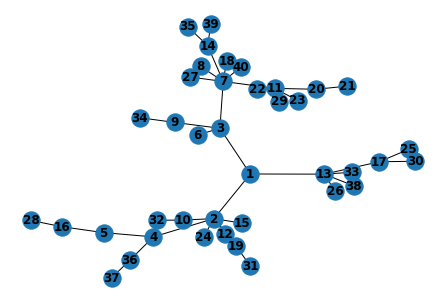

-Numer of endpoints: 24 , -Numer of routers: 9 , -Numer of servers: 7


In [7]:
#draw the network
import matplotlib.pyplot as plt

nx.draw(Network, with_labels=True, font_weight='bold', pos=nx.spring_layout(Network))
plt.savefig("path.png")
plt.show()
print ('-Numer of endpoints:', cont_endponint,', -Numer of routers:',cont_router,', -Numer of servers:',cont_server)

In [8]:
data.head(len(data)) 

,Edge_id,From_id,To_id,From_type,To_type,Capacity,U_cost,O_cost
1,1,1,2,R1,S1,150,10,20
2,2,1,3,R1,R2,200,15,25
3,3,1,13,R1,R7,200,15,25
4,4,2,1,S1,R1,150,10,20
5,5,2,4,S1,S2,150,10,20
6,6,2,10,S1,S3,150,10,20
7,7,2,12,S1,Ep3,16,5,10
8,8,2,15,S1,Ep4,16,5,10
9,9,2,19,S1,R9,150,10,20
10,10,2,24,S1,Ep9,16,5,10


In [9]:
dat_node.head(len(dat_node))

,id,type,O_cost
1,1,R1,15
2,2,S1,10
3,3,R2,15
4,4,S2,10
5,5,R3,15
6,6,Ep1,5
7,7,R4,15
8,8,Ep2,5
9,9,R5,15
10,10,S3,10


In [10]:
Vn=n_nodes
En=0
for i in range(1, len(data)+1): 
    if En <= data['Edge_id'][i]:
        En = data['Edge_id'][i]

In [22]:
#create de file data.dat with the information of the network for optimization
with open("data.dat", "w") as f:
    f.write("""
data;
#-----------------------------------------------------------------------
#liczba łuki, zapotrzebowań oraz ścieżek

param Vn := {Vn};
param En := {En};
param Dn := {Dn};
#-----------------------------------------------------------------------
#rozmiar zapotrzebowania d, węzeł żródłowy d, węzeł docelowy d

param : h  s  t :=
 1      {h} {s} {t}
 2      {h} {s} {t2} 
;
        """.format(Vn=Vn, En=En, Dn=2, h=2, s=21, t=33,t2=24))

#*************************************************************************

with open("data.dat", "a") as f:
    f.write("""
#-----------------------------------------------------------------------
#węzłe-łącze  Aev(e,v) 
param : A :=
""")

    for i in range(1, En+1):       
        f.write("""  {link_number}  {From_edge_number}    1
""".format(link_number=data['Edge_id'][i], From_edge_number=data['From_id'][i]))
    f.write(""";""")

#*************************************************************************    
    
with open("data.dat", "a") as f:
    f.write("""

#----------------------------------------------------------------------- 
#węzłe-łącze  Bev(e,v) 
param : B :=
""")
        
    for i in range(1,En+1):       
        f.write("""  {link_number}  {to_edge_number}    1
""".format(link_number=data['Edge_id'][i], to_edge_number=data['To_id'][i]))
    f.write(""";""")

#*************************************************************************    
    
with open("data.dat", "a") as f:
    f.write("""

#-----------------------------------------------------------------------       
#koszt jednostkowy użycia przepływności na łączach     
param : K :=
""")
    for i in range(1,En+1):       
        f.write("""  {link_number}  {cost}
""".format(link_number=data['Edge_id'][i], cost=data['U_cost'][i]))
    f.write(""";""")
    
#*************************************************************************    
    
with open("data.dat", "a") as f:
    f.write("""

#-----------------------------------------------------------------------       
#koszt jednostkowy użycia przepływności na łączach     
param : C :=
""")
    for i in range(1,En+1):       
        f.write("""  {link_number}  {cap}
""".format(link_number=data['Edge_id'][i], cap=data['Capacity'][i]))
    f.write(""";""")
        
#*************************************************************************        
        
with open("data.dat", "a") as f:
    f.write("""
    
#----------------------------------------------------------------------- 
#upper bound for the degree of transit node v     
param : G :=
""")
    for i in range(1,Vn+1):       
        f.write("""  {node_number}  {grade}
""".format(node_number=i, grade=Network.degree[i]))        
    f.write(""";""")

#*************************************************************************      
    
    
with open("data.dat", "a") as f:
     f.write("""
end;
""")

In [23]:
#run the math-program with the data of the network created 
!cbc projekt.mod%data.dat -solve -solu result.csv

Welcome to the CBC MILP Solver 
Version: Trunk (unstable) 
Build Date: Mar 27 2019 

command line - cbc projekt.mod%data.dat -solve -solu result.csv (default strategy 1)
GMPL model file ./projekt.mod and data file ./data.dat
Reading model section from ./projekt.mod...
67 lines were read
Reading data section from ./data.dat...
393 lines were read
Generating z...
Generating c1...
Generating c2...
Generating c3...
Generating c4...
Generating c5...
Generating c6...
Generating c7...
Model has been successfully generated
Problem projekt has 355 rows, 352 columns and 1094 elements
Model was imported from ./projekt.mod in 0.073398 seconds
Continuous objective value is 160 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 210 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds

In [1]:
#clean and organize the data optained in the 
with open("result.csv", "r") as f:
    fl =f.readlines()
    f.close()

data_r = pd.DataFrame([], columns=['Demand','Edge','flow'])        
#data = data.append(pd.DataFrame([[v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],ba[v[0]][neig]['cost'],ba[v[0]][neig]['capacity']]], columns=['From_index','To_index','From_type','To_type','Cost','Capacity']), ignore_index = True)        
for j in range (len(fl)):
    flag =0
    temp1=''
    temp2=''
    temp3=''
    for i in range (len(fl[j])):
        if fl[j][i] == 'u' and flag == 0:
            flag =1                    
        elif fl[j][i] == '[' and flag == 1:
            flag =2
        elif fl[j][i] != ',' and flag == 2:        
            temp1 = temp1+fl[j][i]
        elif fl[j][i] == ',' and flag == 2:
            flag =3            
        elif fl[j][i] != ']' and flag == 3:
            temp2 = temp2+fl[j][i]            
        elif fl[j][i] == ']' and flag == 3:
            flag =4
        elif fl[j][i] != ' ' and flag == 4:
            flag =5
            temp3 = temp3+fl[j][i]
        elif fl[j][i] != ' ' and flag == 5:
            temp3 = temp3+fl[j][i]
        elif fl[j][i] == ' ' and flag == 5:
            break
    if temp1 != '':        
        data_r = data_r.append(pd.DataFrame([[temp2,temp1,temp3]], columns=['Demand','Edge','flow']), ignore_index = True)        


NameError: name 'pd' is not defined

In [48]:
Net_demand = nx.Graph()
data_r['From']=''
data_r['To']=''
for i in range(len(data_r)):
    Net_demand.add_node(data.iloc[(int(data_r.iloc[i]['Edge']))-1]['From_id'])
    Net_demand.add_node(data.iloc[(int(data_r.iloc[i]['Edge']))-1]['To_id'])
    data_r['From'][i]=str(data.iloc[(int(data_r.iloc[i]['Edge']))-1]['From_id'])+' - '+str(data.iloc[(int(data_r.iloc[i]['Edge']))-1]['From_type'])
    data_r['To'][i]=str(data.iloc[(int(data_r.iloc[i]['Edge']))-1]['To_id'])+' - '+str(data.iloc[(int(data_r.iloc[i]['Edge']))-1]['To_type'])

    #print (data_r.iloc[i]['Edge'], data.iloc[(int(data_r.iloc[i]['Edge']))-1]['From_index'], data.iloc[(int(data_r.iloc[i]['Edge']))-1]['To_index'])
for i in range(len(data_r)):    
    Net_demand.add_edge(data['From_id'][(int(data_r.iloc[i]['Edge']))-1], data['To_id'][(int(data_r.iloc[i]['Edge']))-1])
   

In [49]:
data_r.head(len(data_r))    

,Demand,Edge,flow,From,To
0,1,1,1,1 - R1,2 - S1
1,1,2,1,1 - R1,3 - Ep1
2,1,3,0,1 - R1,4 - S2
3,1,4,1,1 - R1,8 - Ep3
4,1,5,0,1 - R1,19 - Ep9
5,1,6,0,1 - R1,22 - Ep11
6,1,7,1,1 - R1,23 - Ep12
7,1,8,1,2 - S1,1 - R1
8,1,9,0,2 - S1,5 - Ep2
9,1,10,1,2 - S1,6 - S3


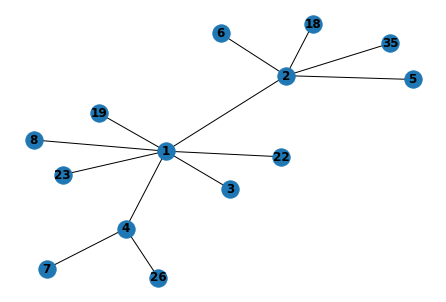

In [50]:
nx.draw(Net_demand, with_labels=True, font_weight='bold', pos=nx.spring_layout(Net_demand))
plt.savefig("demands.png")
plt.show() 

In [79]:
import random as rnd
import time

list_ep=[]
#obtener los endpoints y servidores de la red 
for i in range (1, len(dat_node)+1):
    if dat_node['type'][i][0:1] == 'E':
        list_ep.append(dat_node['id'][i])

print(list_ep)
Endp_A=rnd.sample(list_ep,  3)
print (Endp_A)

level_node(Endp_A[0])

#obtener los vecinos y el nivel en el que se encuentran (saltos)
def level_node (nram):   
    
    list_node = []
    list_type=[]
    list_level=[]
    list_temp=[]
    level=0

    list_node.append(nram)
    list_type.append(dat_node['type'][nram])
    list_level.append(level)
    fle=1 #bandera que indica que se subio de nivel
    list_temp=list_node

    while 1:
        #time.sleep(2)
        list_temp2=[]   
        if fle ==1: #aumentar el nivel de nodo
            level +=1
            fle=0
        else:
            break
        for i in range (len(list_temp)):
            adj = list(nx.neighbors(Network, list_temp[i])) #obtiene los vecinos del nodo        
            for j in range (len(adj)):
                fn=0
                for k in range (len(list_node)):
                    if adj[j]==list_node[k]:
                        fn=1
                if fn == 0:
                    list_temp2.append(adj[j])
                    list_node.append(adj[j])
                    list_type.append(dat_node['type'][adj[j]])
                    list_level.append(level)
                    fle=1
        list_temp=list_temp2

    data_level = pd.DataFrame([], columns=['id','type','level'])    
    data_level['id'], data_level['type'], data_level['level'] =list_node,list_type,list_level
    print (data_level)






[6, 8, 12, 15, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40]
[35, 31, 27]
    id  type  level
0   35  Ep20      0
1   14    S4      1
2    7    R4      2
3   39  Ep23      2
4    3    R2      3
5    8   Ep2      3
6   11    R6      3
7   18   Ep5      3
8   27  Ep12      3
9   40  Ep24      3
10   1    R1      4
11   6   Ep1      4
12   9    R5      4
13  20    S6      4
14  22   Ep7      4
15  23   Ep8      4
16  29  Ep14      4
17   2    S1      5
18  13    R7      5
19  34  Ep19      5
20  21   Ep6      5
21   4    S2      6
22  10    S3      6
23  12   Ep3      6
24  15   Ep4      6
25  19    R9      6
26  24   Ep9      6
27  17    R8      6
28  26  Ep11      6
29  33  Ep18      6
30  38  Ep22      6
31   5    R3      7
32  36    S7      7
33  32  Ep17      7
34  31  Ep16      7
35  25  Ep10      7
36  30  Ep15      7
37  16    S5      8
38  37  Ep21      8
39  28  Ep13      9
